In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Dataset = pd.read_csv('DataSet.csv')

In [4]:
Dataset

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,year,company_name
0,15,7,84009,0,0,1466,15.0,100.000000,66.67000,47.0,18,12958.0,2009,4
1,15,7,22185,2,1,92,23.0,100.000000,78.26000,43.0,18,14761.0,2009,4
2,15,7,22185,3,2,92,31.0,100.000000,77.42000,58.0,18,12139.0,2009,4
3,15,7,73134,4,3,92,21.0,100.000000,66.67000,52.0,18,5082.0,2009,4
4,15,7,73135,5,4,92,15.0,100.000000,60.00000,93.0,18,3712.0,2009,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952414,4,2,13959,341954,338567,2598,17.0,95.704712,99.89875,65.0,18,5814.0,2019,5
3952415,4,2,13959,341955,338568,2598,20.0,95.704712,99.89875,40.0,6,11815.0,2019,5
3952416,4,2,13959,341956,338569,2598,19.0,95.704712,99.89875,63.0,18,4139.0,2019,5
3952417,4,2,60247,341957,338570,2598,18.0,95.704712,99.89875,56.0,8,2469.0,2019,5


# Multipal regression

In [5]:
x = Dataset.iloc[:,:-3].values     #Features Matrix
y = Dataset.iloc[:,-3].values      #dependent variable vector

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 1)

In [7]:
from sklearn.linear_model import LinearRegression      # Multipal regression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = regressor.predict(x_test)

In [9]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 6743.95 12173.  ]
 [ 5557.87  2865.  ]
 [ 2802.96  3206.  ]
 ...
 [ 5123.91  3168.  ]
 [ 5627.23  3061.  ]
 [ 4619.03  1481.  ]]


In [10]:
#predicting multiple linear regression to the training set
from sklearn.metrics import r2_score                 #regressor.score(x_test, y_test)
print('R²_Score: {:.2f} %'.format(r2_score(y_test, y_pred)*100))

R²_Score: 25.22 %


# Polynomial regression

In [11]:
x = Dataset.iloc[:,:-3].values     #Features Matrix
y = Dataset.iloc[:,-3].values  #dependent variable vector

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 1)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(poly_reg.transform(x_test))

In [15]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 6818.22 12173.  ]
 [ 4723.8   2865.  ]
 [ 3130.44  3206.  ]
 ...
 [ 4452.73  3168.  ]
 [ 4607.6   3061.  ]
 [ 5210.07  1481.  ]]


In [16]:
from sklearn.metrics import r2_score
print('R²_Score: {:.2f} %'.format(r2_score(y_test, y_pred)*100))

R²_Score: 31.27 %


# Decision_tree_regression

In [17]:
x = Dataset.iloc[:,:-3].values     #Features Matrix
y = Dataset.iloc[:,-3].values      #dependent variable vector 

In [18]:
y = y.reshape(len(y),1)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 1)

In [20]:
from sklearn.tree import DecisionTreeRegressor           #Build Decision tree regressor model
regressor = DecisionTreeRegressor(random_state=0)            #This model is good for high dimensional dataset.
regressor.fit(x_train,y_train)       

DecisionTreeRegressor(random_state=0)

In [21]:
y_pred = regressor.predict(x_test)

In [22]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[11614.   12173.  ]
 [ 3813.25  2865.  ]
 [ 3397.12  3206.  ]
 ...
 [ 2744.    3168.  ]
 [ 3230.28  3061.  ]
 [ 1481.    1481.  ]]


In [23]:
from sklearn.metrics import r2_score              
print('R²_Score: {:.2f} %'.format(r2_score(y_test, y_pred)*100))

R²_Score: 67.86 %


# Random_forest_regression

In [24]:
x = Dataset.iloc[:,:-3].values     #Features Matrix
y = Dataset.iloc[:,-3].values      #dependent variable vector

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 1)

In [26]:
from sklearn.ensemble import RandomForestRegressor                    #Rendom forest model build
regressor = RandomForestRegressor(n_estimators= 100, random_state=0)
y_train = y_train.ravel()
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [27]:
y_pred = regressor.predict(x_test)

In [28]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[10897.51 12173.  ]
 [ 3875.84  2865.  ]
 [ 3399.13  3206.  ]
 ...
 [ 2997.07  3168.  ]
 [ 2919.66  3061.  ]
 [ 1364.38  1481.  ]]


In [29]:
from sklearn.metrics import r2_score              
print('R²_Score: {:.2f} %'.format(r2_score(y_test, y_pred)*100))

R²_Score: 82.82 %


In [30]:
Model = pd.DataFrame({'Regression Model':['Multipal Linear Regression','Polynomial Regression','Decision Tree Regression',
                                          'Random Forest Regression'],
                      'R²_Score_%':['25.22','31.27','67.86','82.82']},
                      index = [1,2,3,4])


In [31]:
Model['R²_Score_%'] = Model['R²_Score_%'].astype(float)

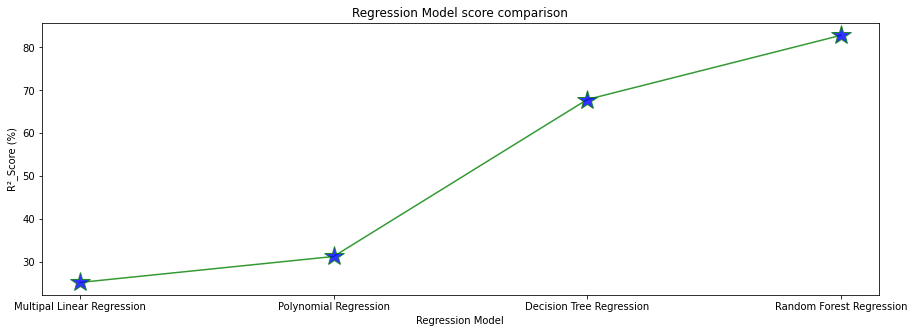

In [32]:
fig = plt.figure(figsize=(15,5))
plt.plot('Regression Model','R²_Score_%',data = Model,  marker='*', markersize=20, markerfacecolor = "b",color = 'g',alpha =0.8)
plt.xlabel('Regression Model')
plt.ylabel('R²_Score (%)')
plt.title('Regression Model score comparison')
plt.show()